In [37]:
import pandas as pd
from pandas_datareader import wb,data
import numpy as np
%matplotlib inline
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [4]:
BAC = data.DataReader('BAC','yahoo',start,end)
C = data.DataReader('C','yahoo',start,end)
GS = data.DataReader('GS','yahoo',start,end)
JPM = data.DataReader('JPM','yahoo',start,end)
WFC = data.DataReader('WFC','yahoo',start,end)
MS = data.DataReader('MS','yahoo',start,end)

In [5]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [6]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

In [7]:
bank_stocks.head(0)

Empty DataFrame
Columns: [(BAC, High), (BAC, Low), (BAC, Open), (BAC, Close), (BAC, Volume), (BAC, Adj Close), (C, High), (C, Low), (C, Open), (C, Close), (C, Volume), (C, Adj Close), (GS, High), (GS, Low), (GS, Open), (GS, Close), (GS, Volume), (GS, Adj Close), (JPM, High), (JPM, Low), (JPM, Open), (JPM, Close), (JPM, Volume), (JPM, Adj Close), (MS, High), (MS, Low), (MS, Open), (MS, Close), (MS, Volume), (MS, Adj Close), (WFC, High), (WFC, Low), (WFC, Open), (WFC, Close), (WFC, Volume), (WFC, Adj Close)]
Index: []

[0 rows x 36 columns]

In [8]:
for i in tickers:
    print(i,bank_stocks[i]['Close'].max())

BAC 54.900001525878906
C 564.0999755859375
GS 247.9199981689453
JPM 70.08000183105469
MS 89.30000305175781
WFC 58.52000045776367


In [9]:
returns = pd.DataFrame()

In [10]:
for tick in tickers:
    returns[tick+' Returns'] = bank_stocks[tick]['Close'].pct_change()

In [11]:
returns

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


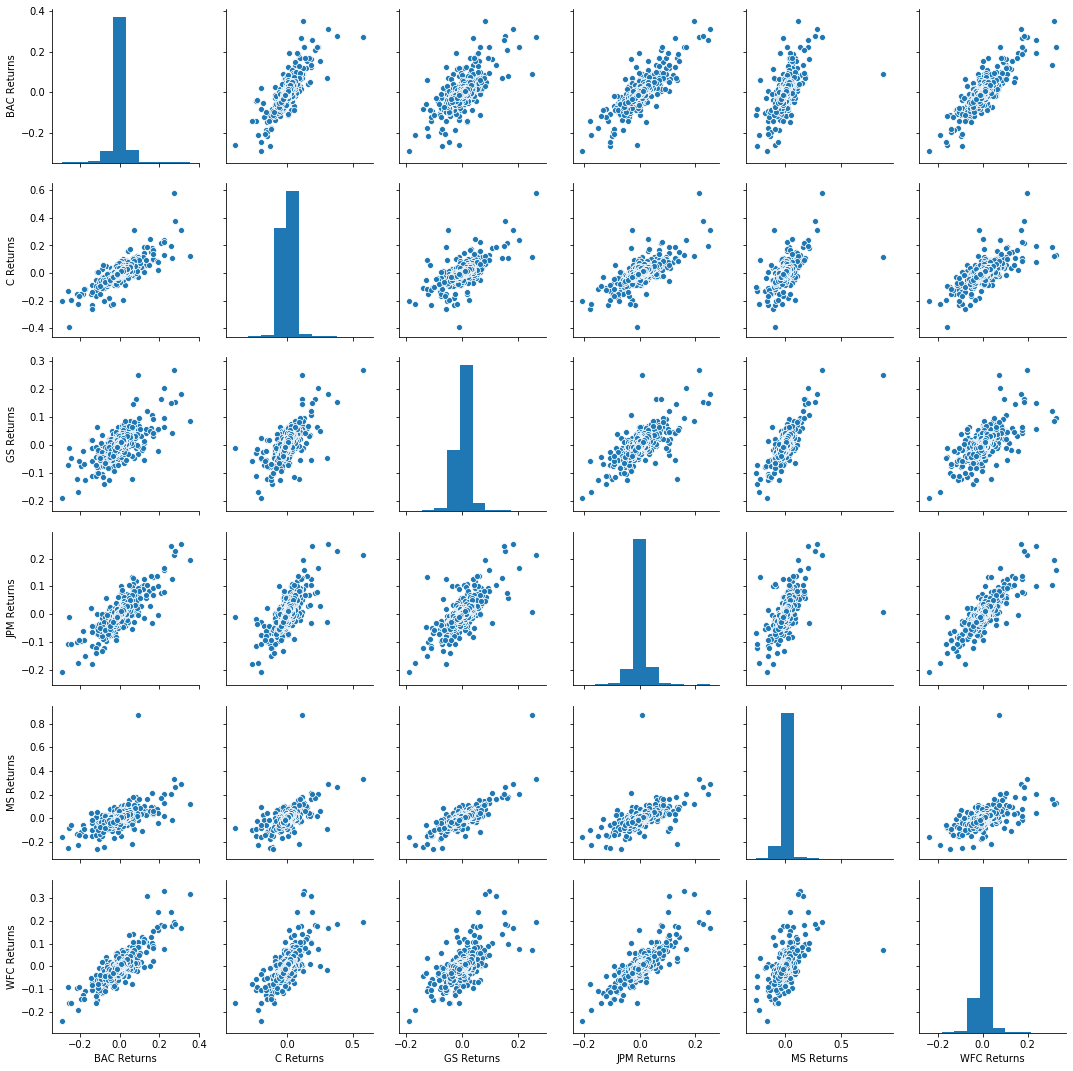

In [14]:
sns.pairplot(returns[1:])

In [15]:
returns.idxmin() #returns index of minimum returns of 'returns' dataset

BAC Returns   2009-01-20
C Returns     2009-02-27
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

In [16]:
returns.idxmax()

BAC Returns   2009-04-09
C Returns     2008-11-24
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

In [17]:
returns.std()  #std is used for standard devition and here using std we can find out the riskiest share i.e. Citibank

BAC Returns    0.036647
C Returns      0.038672
GS Returns     0.025390
JPM Returns    0.027667
MS Returns     0.037819
WFC Returns    0.030238
dtype: float64

In [18]:
returns.ix['2015-01-01':'2015-12-31'].std()  #here we need to find standard deviation in the year 2015

C:\Users\Laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


BAC Returns    0.016163
C Returns      0.015289
GS Returns     0.014046
JPM Returns    0.014017
MS Returns     0.016249
WFC Returns    0.012591
dtype: float64

C:\Users\Laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


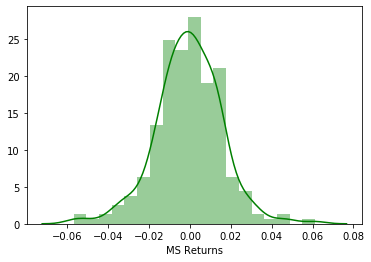

In [26]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MS Returns'],color='green')

C:\Users\Laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


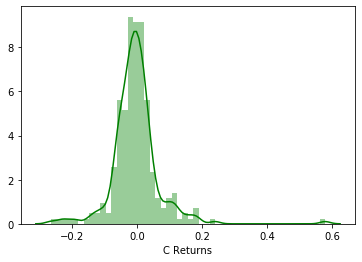

In [27]:
sns.distplot(returns.ix['2008-01-01':'2008-12-31']['C Returns'], color='green', bins=50)

TypeError: 'module' object is not callable

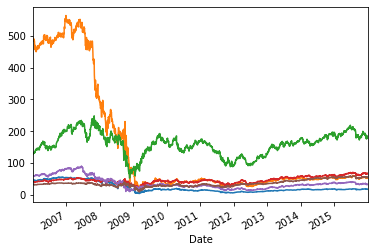

In [33]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick)
plt.legend()

C:\Users\Laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


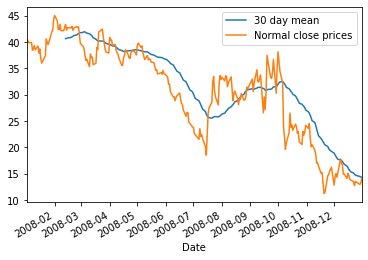

In [38]:
BAC['Close'].ix['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day mean') #to findthe 30 day averageclose price in the year 2008
BAC['Close'].ix['2008-01-01':'2009-01-01'].plot(label='Normal close prices')
plt.legend()

In [39]:
conda install sci-kit lear

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - sci-kit
  - lear

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [40]:
conda install scikit-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Laptop\Anaconda3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    joblib-0.14.1              |             py_0         201 KB
    scikit-learn-0.22          |   py37h6288b17_0         4.7 MB
    ------------------------------------------------------------
                                           Total:         4.9 MB

The following NEW packages will be INSTALLED:

  joblib             pkgs/main/noarch::joblib-0.14.1-py_0
  scikit-learn       pkgs/main/win-64::scikit-learn-0.22-py37h6288b17_0




joblib-0.14.1        | 201 KB    |            |   0% 
joblib-0.14.1        | 201 KB    | 7          |   8% 
joblib-0.14.1        | 201 KB    | ########## | 100% 

scikit-learn-0.22    | 4.7 MB    |            |   0% 
scikit-learn-0.22    | 4.7 MB    | 4   